In [1]:
# Surabhi S Nath
# 2016271

# Ionic basis for intrinsic 40Hz neuronal oscillations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from brian2 import *
import brian2
from IPython.display import Image
from scipy.optimize import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import quantities as u
import pickle

## Fig 1 

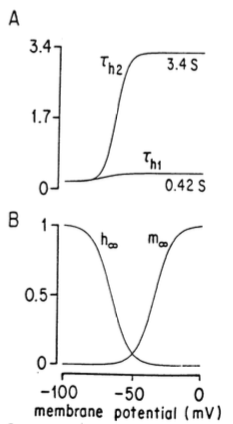

In [3]:
Image(filename="../img/14.png")

In [4]:
def evaltauhm(V):
    tau_h1 = 200 + 220 / (1 + exp(-(V + 71.6)/6.85))
    tau_h2 = 200 + 3200 / (1 + exp(-(V + 63.6)/4))
    h_inf = 1/(1 + exp((V + 65)/6.6))
    m_inf = 1/(1 + exp(-(V + 34)/6.5))
    return tau_h1, tau_h2, h_inf, m_inf

mV = np.linspace(-100, 0, 1000)
a = []
b = []
c = []
d = []
for v in mV:
    r1, r2, r3, r4 = evaltauhm(v)
    a.append(r1)
    b.append(r2)
    c.append(r3)    
    d.append(r4)

In [5]:
a = np.array(a)
b = np.array(b)
c = np.array(c)
d = np.array(d)

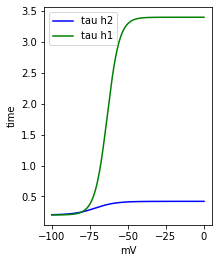

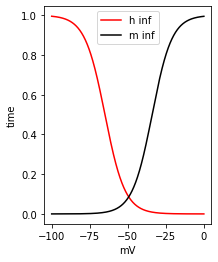

In [6]:
plt.figure(figsize=(3,4))
plt.plot(mV, a/1000, color="b", label="tau h2")
plt.plot(mV, b/1000, color="g", label="tau h1")
plt.xlabel("mV")
plt.ylabel("time")
plt.legend()
plt.figure(figsize=(3,4))
plt.plot(mV, c, color="r", label="h inf")
plt.plot(mV, d, color="black", label="m inf")
plt.xlabel("mV")
plt.ylabel("time")
plt.legend()

In [7]:
C = 1 #microF
g_L = 0.1 #mS
g_Na = 52
g_K = 20
g_Nap = 0.1
g_Ks = 14
E_L = -60
E_Na = 55
E_K = -90
phi_n = 28.57
phi_h = 28.57
phi_h1 = 1
phi_h2 = 1
phi_mm = 1
sigma = 0
rho = 0.6
tau_mm = 6 #ms

In [8]:
def dz_dt(z, t, I_app):
    alpha_m = -0.1 * (z[0] + 30 - sigma) / (exp(-0.1*(z[0] + 30 - sigma)) - 1)
    beta_m = 4 * exp(-(z[0] + 55 - sigma)/18)
    m_x = alpha_m / (alpha_m + beta_m) 
    alpha_h = 0.07 * exp(-(z[0] + 44 - sigma)/20)
    beta_h = 1 / (exp(-0.1 * (z[0] + 14 - sigma)) + 1)
    I_Na = g_Na * (m_x ** 3) * z[1] * (z[0] - E_Na)

    alpha_n = -0.01 * (z[0] + 34 - sigma) / (exp(-0.1 * (z[0] + 34 - sigma)) - 1)
    beta_n = 0.125 * exp(-(z[0] + 44 - sigma) / 80)
    I_K = g_K * (z[2] ** 4) * (z[0] - E_K)
    
    m_inf = 1/(1 + exp(-(z[0] + 51)/5))
    I_Nap = g_Nap * m_inf * (z[0] - E_Na)
    
    h1_inf = 1/(1 + exp((z[0] + 65)/6.6))
    h2_inf = 1/(1 + exp((z[0] + 65)/6.6))
    tau_h1 = 200 + 220 / (1 + exp(-(z[0] + 71.6)/6.85))
    tau_h2 = 200 + 3200 / (1 + exp(-(z[0] + 63.6)/4))
    mm_inf = 1/(1 + exp(-(z[0] + 34)/6.5))
    I_Ks = g_Ks * z[5] * (rho * z[3] + (1 - rho) * z[4]) * (z[0] - E_K)

    dV_dt = (-g_L * (z[0] - E_L) - I_Nap - I_Ks - I_Na - I_K + I_app) / C
    dh_dt = phi_h * (alpha_h * (1 - z[1]) - beta_h * z[1])
    dn_dt = phi_n * (alpha_n * (1 - z[2]) - beta_n * z[2])
    dh1_dt = phi_h1 * (h1_inf - z[3])/tau_h1
    dh2_dt = phi_h2 * (h2_inf - z[4])/tau_h2
    dmm_dt = phi_mm * (mm_inf - z[5])/tau_mm
    
    return [dV_dt, dh_dt, dn_dt, dh1_dt, dh2_dt, dmm_dt]

In [9]:
def find_spikes(arr):
    peaks = np.where((arr[1:-1] > arr[0:-2]) * (arr[1:-1] > arr[2:]))[0] + 1
    return peaks

## Fig 2a

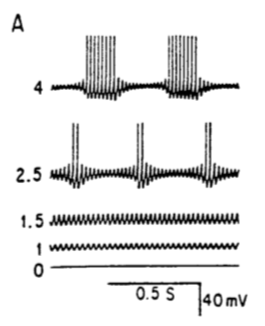

In [10]:
Image(filename="../img/15.png")

In [11]:
V1 = pickle.load(open("ret0_Fig2.pk", 'rb'))[:,0]
V2 = pickle.load(open("ret05_Fig2.pk", 'rb'))[:,0]
V3 = pickle.load(open("ret08_Fig2.pk", 'rb'))[:,0]
V4 = pickle.load(open("ret1_Fig2.pk", 'rb'))[:,0]
V5 = pickle.load(open("ret15_Fig2.pk", 'rb'))[:,0]
V6 = pickle.load(open("ret25_Fig2.pk", 'rb'))[:,0]
V7 = pickle.load(open("ret4_Fig2.pk", 'rb'))[:,0]

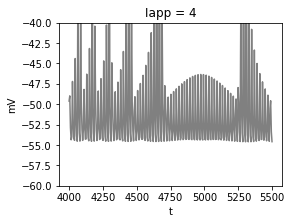

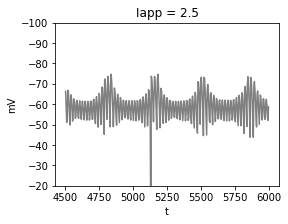

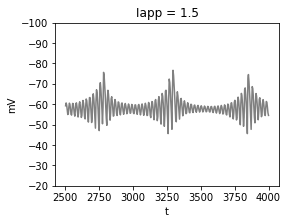

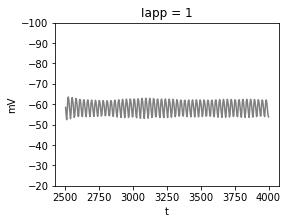

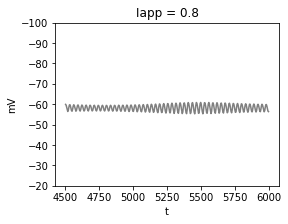

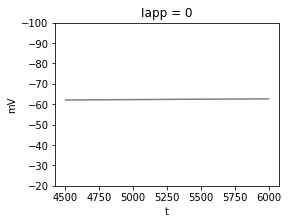

In [12]:
t1 = np.linspace(0, 4000, 1000)
t2 = np.linspace(0, 6000, 1500)
t3 = np.linspace(0, 10000, 2000)

start1 = 625
start2 = 1125
start3 = 800
end3 = 1100

plt.figure(figsize=(4,3))
plt.ylim((-60, -40))
plt.plot(t3[start3:end3], V7[start3:end3], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 4")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-20, -100))
plt.plot(t2[start2:], V6[start2:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 2.5")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-20, -100))
plt.plot(t1[start1:], V5[start1:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1.5")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-20, -100))
plt.plot(t1[start1:], V4[start1:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-20, -100))
plt.plot(t2[start2:], V3[start2:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0.8")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-20, -100))
plt.plot(t2[start2:], V2[start2:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0")
plt.show()

# plt.figure(figsize=(4,3))
# plt.ylim((-20, -100))
# plt.plot(t1[start1:], V1[start1:], color='grey')

In [13]:
den = 1.5

spikes_V1 = find_spikes(V1[start1:])
freqV1 = len(spikes_V1)/(t1[-1] - t1[start1]) * 1000

spikes_V2 = find_spikes(V2[start2:])
freqV2 = len(spikes_V2)/(t2[-1] - t2[start2]) * 1000

spikes_V3 = find_spikes(V3[start2:])
freqV3 = len(spikes_V3)/(t2[-1] - t2[start2]) * 1000

spikes_V4 = find_spikes(V4[start1:])
freqV4 = len(spikes_V4)/(t1[-1] - t1[start1]) * 1000

spikes_V5 = find_spikes(V5[start1:])
freqV5 = len(spikes_V5)/(t1[-1] - t1[start1]) * 1000

spikes_V6 = find_spikes(V6[start2:])
freqV6 = len(spikes_V6)/(t2[-1] - t2[start2]) * 1000

spikes_V7 = find_spikes(V7[start3:end3])
freqV7 = len(spikes_V7)/(t2[end3] - t2[start3]) * 1000

In [14]:
print(freqV1, freqV2, freqV3, freqV4, freqV5, freqV6, freqV7)
V1bursts = 0/den; V2bursts = 0/den; V3bursts = 0/den; V4bursts = 0/den; V5bursts = 3/den; V6bursts = 4/den; V7bursts = 6/den;


0.0 0.0 32.732174688057036 34.72459893048129 38.7312834224599 46.7602495543672 61.62555555555556


In [15]:
num_bursts = []
num_bursts.append(V1bursts)
num_bursts.append(V2bursts)
num_bursts.append(V3bursts)
num_bursts.append(V4bursts)
num_bursts.append(V5bursts)
num_bursts.append(V6bursts)

## Fig 2b

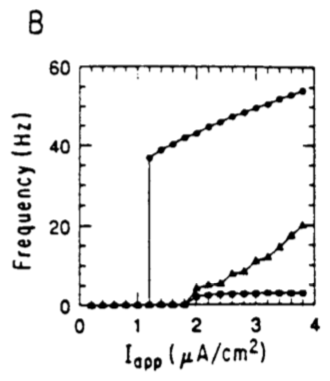

In [16]:
Image(filename="../img/16.png")

In [17]:
nbV1 = 0
nbV2 = 0
nbV3 = 0
nbV4 = 0
nbV5 = 2
nbV6 = 3
nbV7 = 4

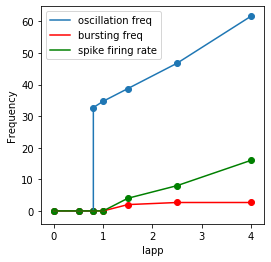

In [18]:
plt.figure(figsize=(4,4))
plt.scatter([0, 0.5, 0.8, 0.8, 1, 1.5, 2.5, 4], [freqV1, freqV2, 0, freqV3, freqV4, freqV5, freqV6, freqV7])
plt.plot([0, 0.5, 0.8, 0.8, 1, 1.5, 2.5, 4], [freqV1, freqV2, 0, freqV3, freqV4, freqV5, freqV6, freqV7], label="oscillation freq")

plt.scatter([0, 0.5, 0.8, 1, 1.5, 2.5, 4], [V1bursts, V2bursts, V3bursts, V4bursts, V5bursts, V6bursts, V6bursts], color="r")
plt.plot([0, 0.5, 0.8, 1, 1.5, 2.5, 4], [V1bursts, V2bursts, V3bursts, V4bursts, V5bursts, V6bursts, V6bursts], color="r", label="bursting freq")

plt.scatter([0, 0.5, 0.8, 1, 1.5, 2.5, 4], [V1bursts * nbV1, V2bursts * nbV2, V3bursts * nbV3, V4bursts * nbV4, V5bursts * nbV5, V6bursts * nbV6, V7bursts * nbV7], color="g")
plt.plot([0, 0.5, 0.8, 1, 1.5, 2.5, 4], [V1bursts * nbV1, V2bursts * nbV2, V3bursts * nbV3, V4bursts * nbV4, V5bursts * nbV5, V6bursts * nbV6, V7bursts * nbV7], color="g", label="spike firing rate")

plt.xlabel("Iapp")
plt.ylabel("Frequency")
plt.legend()

## Fig 2c 

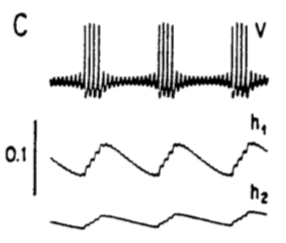

In [19]:
Image(filename="../img/17.png")

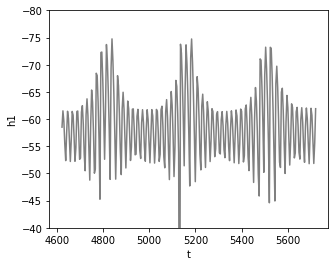

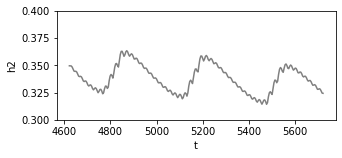

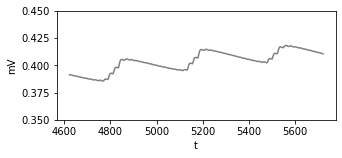

In [20]:
plt.figure(figsize=(5,4))
plt.plot(t2[start2+30:-70], V6[start2+30:-70], color='grey')
plt.ylim((-40,-80))
h16 = pickle.load(open("ret25_Fig2.pk", 'rb'))[:,3]
h26 = pickle.load(open("ret25_Fig2.pk", 'rb'))[:,4]
plt.xlabel("t")
plt.ylabel("h1")
plt.show()

plt.figure(figsize=(5,2))
plt.plot(t2[start2+30:-70], h16[start2+30:-70], color='grey')
plt.ylim((0.3,0.4))
plt.xlabel("t")
plt.ylabel("h2")
plt.show()

plt.figure(figsize=(5,2))
plt.plot(t2[start2+30:-70], h26[start2+30:-70], color='grey')
plt.ylim((0.35,0.45))
plt.xlabel("t")
plt.ylabel("mV")
plt.show()

## Fig 2d 

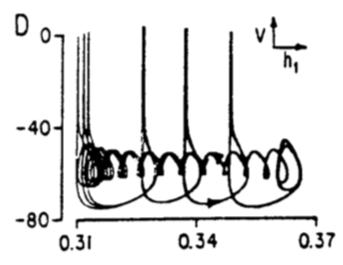

In [21]:
Image(filename="../img/18.png")

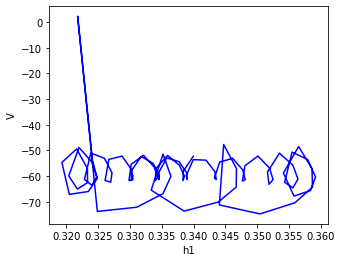

In [22]:
plt.figure(figsize=(5,4))
plt.plot(h16[start2+120:-160], V6[start2+120:-160], color='blue')
plt.xlabel("h1")
plt.ylabel("V")
plt.show()

## Fig 3a 

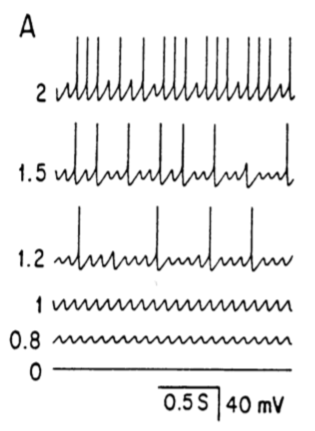

In [23]:
Image(filename="../img/19.png")

In [24]:
def find_spikess(arr):
    spikes = np.where(arr > -42)[0]
    return spikes

In [25]:
V1 = pickle.load(open("ret0_Fig3ab.pk", 'rb'))[:,0]
V2 = pickle.load(open("ret08_Fig3ab.pk", 'rb'))[:,0]
V3 = pickle.load(open("ret1_Fig3ab.pk", 'rb'))[:,0]
V4 = pickle.load(open("ret15_Fig3ab.pk", 'rb'))[:,0]
V5 = pickle.load(open("ret18_Fig3ab.pk", 'rb'))[:,0]
V6 = pickle.load(open("ret2_Fig3ab.pk", 'rb'))[:,0]
V7 = pickle.load(open("ret3_Fig3ab.pk", 'rb'))[:,0]
V8 = pickle.load(open("ret4_Fig3ab.pk", 'rb'))[:,0]

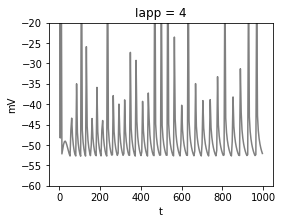

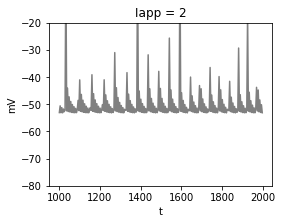

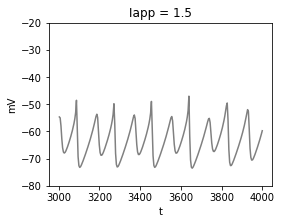

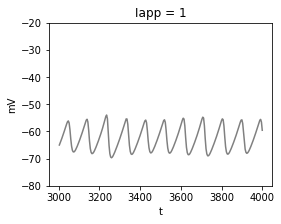

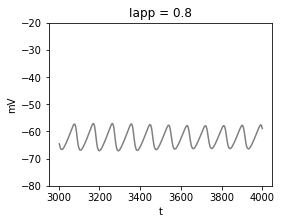

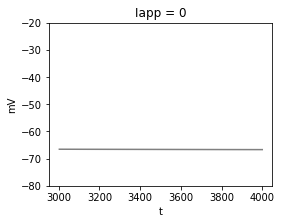

In [26]:
t = np.linspace(0, 4000, 1000)

start = 750
start2, end2 = 250, 500

plt.figure(figsize=(4,3))
plt.ylim((-60, -20))
plt.plot(t[0:start2], V8[0:start2], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 4")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-80, -20))
plt.plot(t[start2:end2], V6[start2:end2], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 2")
plt.show()

# plt.figure(figsize=(4,3))
# plt.ylim((-80, -20))
# plt.plot(t[start:], V5[start:], color='grey')
# plt.xlabel("t")
# plt.ylabel("mV")
# plt.title("Iapp = 1.8")
# plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-80, -20))
plt.plot(t[start:], V4[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1.5")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-80, -20))
plt.plot(t[start:], V3[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-80, -20))
plt.plot(t[start:], V2[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0.8")
plt.show()

plt.figure(figsize=(4,3))
plt.ylim((-80, -20))
plt.plot(t[start:], V1[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0")
plt.show()

## Fig 3b 

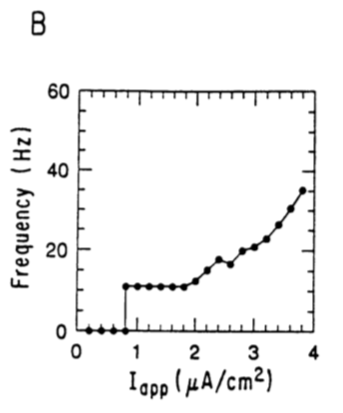

In [27]:
Image(filename="../img/20.png")

In [28]:
spikes_V1 = find_spikes(V1[start:])
freqV1 = len(spikes_V1)/(t[-1] - t[start]) * 1000
spikes_V2 = find_spikes(V2[start:])
freqV2 = len(spikes_V2)/(t[-1] - t[start]) * 1000
spikes_V3 = find_spikes(V3[start:])
freqV3 = len(spikes_V3)/(t[-1] - t[start]) * 1000
spikes_V4 = find_spikes(V4[start:])
freqV4 = len(spikes_V4)/(t[-1] - t[start]) * 1000
spikes_V5 = find_spikess(V5[start2:end2])
freqV5 = len(spikes_V5)/(t[end2] - t[start2]) * 1000
spikes_V6 = find_spikess(V6[start2:end2])
freqV6 = len(spikes_V6)/(t[end2] - t[start2]) * 1000
spikes_V7 = find_spikess(V7[start2:end2])
freqV7 = len(spikes_V7)/(t[end2] - t[start2]) * 1000
spikes_V8 = find_spikes(V8[0:start2])
freqV8 = len(spikes_V8)/(t[start2] - t[0]) * 1000

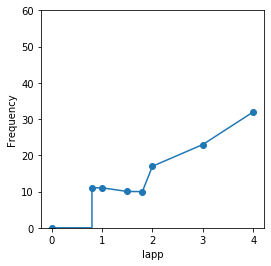

In [29]:
plt.figure(figsize=(4,4))
plt.scatter([0, 0.8, 1, 1.5, 1.8, 2, 3, 4], [freqV1, freqV2, freqV3, freqV4, freqV5, freqV6, freqV7, freqV8])
plt.plot([0, 0.8, 0.8, 1, 1.5, 1.8, 2, 3, 4], [freqV1, 0, freqV2, freqV3, freqV4, freqV5, freqV6, freqV7, freqV8])
plt.ylim((0,60))
plt.xlabel("Iapp")
plt.ylabel("Frequency")
plt.show()

## Fig 3c 

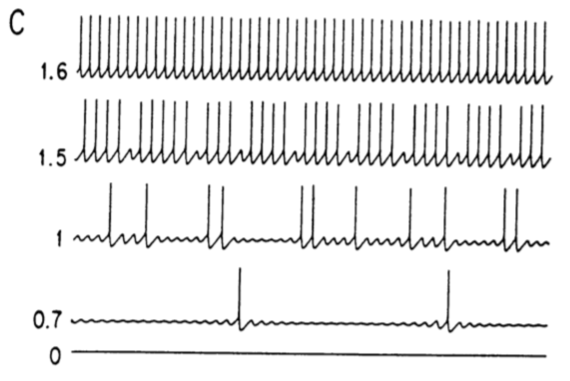

In [30]:
Image(filename="../img/21.png")

In [31]:
V1 = pickle.load(open("ret0_Fig3c.pk", 'rb'))[:,0]
V2 = pickle.load(open("ret07_Fig3c.pk", 'rb'))[:,0]
V3 = pickle.load(open("ret1_Fig3c.pk", 'rb'))[:,0]
V4 = pickle.load(open("ret15_Fig3c.pk", 'rb'))[:,0]
V5 = pickle.load(open("ret16_Fig3c.pk", 'rb'))[:,0]

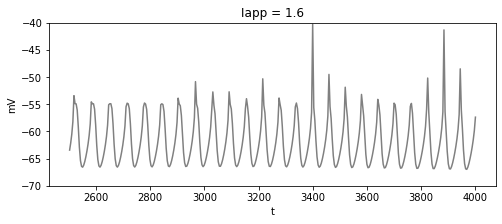

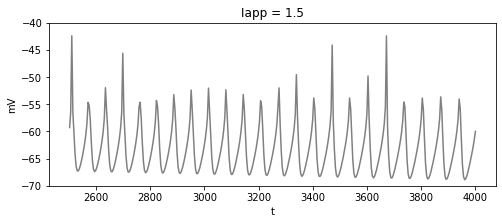

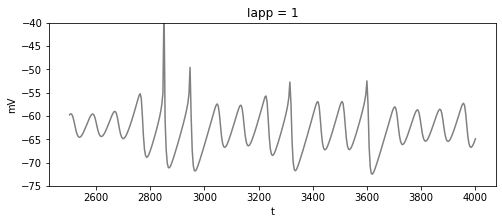

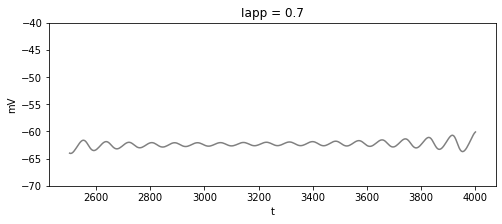

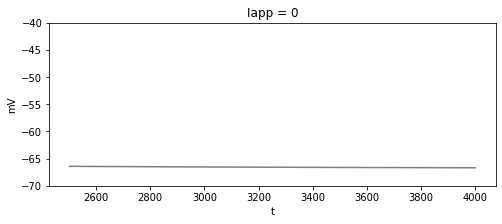

In [32]:
t = np.linspace(0, 4000, 1000)

start = 625

plt.figure(figsize=(8,3))
plt.ylim((-70, -40))
plt.plot(t[start:], V5[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1.6")
plt.show()

plt.figure(figsize=(8,3))
plt.ylim((-70, -40))
plt.plot(t[start:], V4[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1.5")
plt.show()

plt.figure(figsize=(8,3))
plt.ylim((-75, -40))
plt.plot(t[start:], V3[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 1")
plt.show()

plt.figure(figsize=(8,3))
plt.ylim((-70, -40))
plt.plot(t[start:], V2[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0.7")
plt.show()

plt.figure(figsize=(8,3))
plt.ylim((-70, -40))
plt.plot(t[start:], V1[start:], color='grey')
plt.xlabel("t")
plt.ylabel("mV")
plt.title("Iapp = 0")
plt.show()

# 2D mixed-mode model with silent phase instead of subthreshold oscillations 

In [33]:
# 2D model in only x and y

alpha = 6
sigma = -0.1
mu = 0.001

def find_val(x, y):
    if x <= 0:
        return alpha/(1 - x) + y
    if x >= alpha + y:
        return -1
    return alpha + y


def simulate(x, y):
    xarr = []
    yarr = []
    for i in range(5000):
        x = find_val(x, y)
        xarr.append(x)
        y = y - mu * (x + 1) + mu * sigma
        yarr.append(y)
    return xarr, yarr

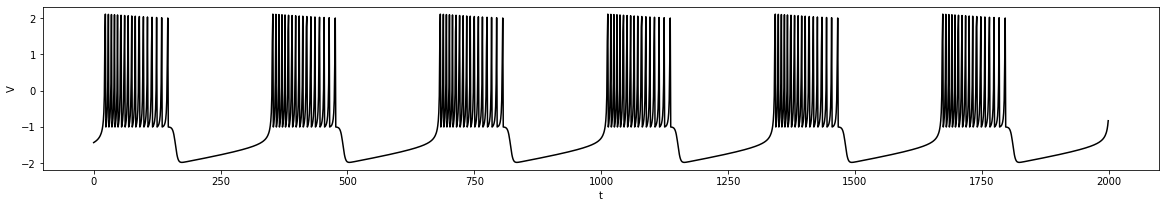

In [34]:
x0 = 0
y0 = 0
ret = simulate(x0, y0)
V = ret[0]
W = ret[1]

plt.figure(figsize=(20,3))
plt.plot(V[3000:], color='black')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

# plt.figure(figsize=(20,3))
# plt.plot(W[3000:], V[3000:], color='black')
# plt.xlabel("W")
# plt.ylabel("V")
# plt.show()

# BONUS

# Mixed-mode bursting in Hindmarsh-Rose model

In [35]:
a = 1
b = 3
c = 1
d = 5
r = 0.001
s = 4
I_app = 2
x1 = -1.3

def dz_dt(z, t):
    dx_dt = z[1] - a * (z[0] ** 3) + b * (z[0] ** 2) + I_app - z[2]
    dy_dt = c - d * (z[0] ** 2) - z[1]
    dw_dt = r * (s * (z[0] - x1) - z[2])
    
    return [dx_dt, dy_dt, dw_dt]

In [36]:
t = np.linspace(0, 3000, 1000)

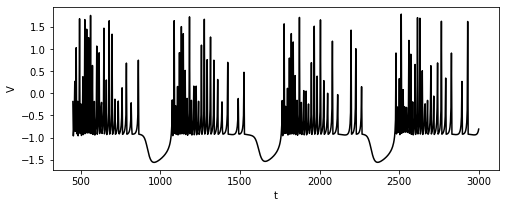

In [37]:
ret = odeint(dz_dt, [0.1, 0.1, 0.1], t)
V = ret[:, 0]

plt.figure(figsize=(8,3))
plt.plot(t[150:], V[150:], color='black')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

# Mixed-mode bursting in FHN model

In [38]:
a = 10**5
c = 0.2
I_app = 1

def dz_dt(z, t):
    dV_dt = a * (- z[0] * (z[0] - 1) * (z[0] - z[2]) - z[1] + I_app) 
    dw_dt = z[0] - c * z[1]
    db_dt = np.cos(2 * np.pi * 1/10 * t)
    
    return [dV_dt, dw_dt, db_dt]

In [39]:
t = np.linspace(0, 50, 10000)

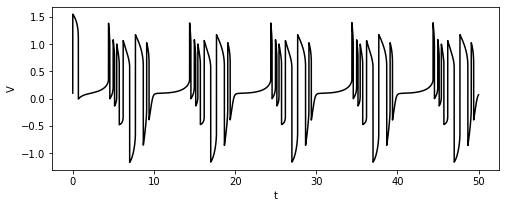

In [40]:
ret = odeint(dz_dt, [0.1, 0.1, 0.5], t)
V = ret[:, 0]
b = ret[:, 2]

plt.figure(figsize=(8,3))
plt.plot(t, V, color='black')
plt.xlabel("t")
plt.ylabel("V")
plt.show()

# plt.figure()
# plt.plot(t, b, color='black')
# plt.xlabel("t")
# plt.ylabel("b")
# plt.show()